# Differences in the Perceptual Processing of Unfamiliar and Familiar

Faces

Kasey McGinness (University of New England)  
Jessica Taubert [](https://orcid.org/0000-0002-6519-8068) (University of Queensland)  
Deborah Apthorp [](https://orcid.org/0000-0001-5785-024X) (University of New England, Australian National University)

Evidence that familiar faces are processed differently from unfamiliar faces has important implications for our understanding of how we recognise the people around us. Although familiarity effects on face recognition performance have been extensively researched, the perceptual and cognitive processes that underlie these differences are comparatively unknown. Using a psychophysical staircase paradigm, we collected data from 28 female participants aged 18-65 years ($M = 43.1$, $SD = 12.7$) and probed perceptual processing by measuring the minimum amount of time required to recognise a previously seen face across three levels of familiarity (unfamiliar, familiar, and self). We also measured a second dependent variable, reaction time, which is thought to reflect both perceptual and cognitive processes. The results revealed that participants needed less time to recognise familiar faces compared to unfamiliar faces. Concomitantly, participants needed less time to respond when tasked with recognising faces compared to unfamiliar faces. As expected, inverted faces took longer to recognise than upright faces, but this effect was reduced for familiar and self-faces. Recognition times provide evidence for distinct perceptual processing based on level of familiarity and suggest that our ability to recognise familiar faces may be poorly characterised by current theories. Overall, the results emphasise the uniqueness of the self-face within the familiarity continuum, as all participants were able to recognise their own face significantly faster than other faces. In light of these results, it is clear that a full understanding of how face recognition is accomplished will require a better characterisation of how we respond to highly familiar faces.

In [ ]:
library(afex)

Loading required package: lme4

Loading required package: Matrix

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- Get and set global package options with: afex_options()
- Set sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************


Attaching package: 'afex'

The following object is masked from 'package:lme4':

    lmer

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'


Attaching package: 'tidyr'

The following objects are masked from 'package:Matrix':

    expand, pack, unpack


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Rows: 28 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Participant
dbl (7): Unfamiliar_Upright, Unfamiliar_Inverted, Familiar_Upright, Familiar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 28 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Participant
dbl (7): Unfamiliar_Upright, Unfamiliar_Inverted, Familiar_Upright, Familiar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
# Do ANOVA analysis of ratings 
RecognitionTimes_ANOVA <- aov_ez("Participant", "Mean_time", Mean_Frames_long, 
                                 within=c("Orientation", "Familiarity"),
                                 factorize = FALSE, covariate = "Age_c",  
                                 anova_table = list(correction = "none", es = "pes")) 

# Do ANOVA - don't GG correct and use partial eta squared

EM_Means_RecognitionTimes_Interaction <- emmeans (RecognitionTimes_ANOVA, ~ Orientation|Familiarity) # Get EM Means for interaction
EM_Means_RecognitionTimes_Familiarity <- emmeans (RecognitionTimes_ANOVA, ~ Familiarity) # Get EM Means

posthoc_RecognitionTimes_Familiarity <- pairs(EM_Means_RecognitionTimes_Familiarity, adjust="bon")

# Use afex_plot to plot these more simply
recTimesPlot <-  afex_plot(RecognitionTimes_ANOVA,  ~ Familiarity,  ~ Orientation, error = "within")


RTs_ANOVA <- aov_ez("Participant", "Mean_RT_ms", Mean_RTs_long, within=c("Orientation", "Familiarity"),
                            factorize = FALSE, covariate = "Age_c", anova_table = list(correction = "none", es = "pes")) # Do ANOVA - don't GG correct and use partial eta squared

EM_Means_RTs <- emmeans (RTs_ANOVA, ~ Orientation|Familiarity) # Get EM Means

# Use afex_plot to plot these more simply

RTsPlot <-  afex_plot(RTs_ANOVA,  ~ Familiarity,  ~ Orientation, error = "within")

# Introduction

Face recognition is the foundation of our social behaviour; it helps us identify the people around us and make inferences about their mood and focus of attention ([Burton et al., 2015](#ref-burton2015a); [Mohr et al., 2018](#ref-mohr2018a)). It has been estimated that we spend 20$\%$ of our day looking at faces, and can recognise over 4000 faces during our lifetime ([Jenkins et al., 2018](#ref-jenkins2018a); [Oruc et al., 2019](#ref-oruc2019a)). For most of us, the ability to recognise and recall identity-specific information appears to occur almost effortlessly, with studies demonstrating that we can recognise a familiar face as quickly as 360 ms ([Besson et al., 2016](#ref-besson2016a); [Blauch et al., 2021](#ref-blauch2021a); [Oruc et al., 2019](#ref-oruc2019a); [Ramon & Belle, 2016](#ref-ramon2016a)). The efficiency with which humans can discriminate within a relatively homogeneous visual category, under constantly changing viewing conditions, has earned us the reputation for being face experts ([Collins et al., 2018](#ref-collins2018a); [Dobs et al., 2019](#ref-dobs2019a); [Kramer et al., 2017](#ref-kramer2017a); [Quek et al., 2021](#ref-quek2021a); [Rossion & Taubert, 2019](#ref-rossion_what_2019); [Towler et al., 2019](#ref-towler_are_2019)).

The precise nature of face expertise remains poorly understood, with debate around whether the processes that govern face recognition are the same for all faces or whether there are distinct perceptual processes for familiar faces ([Abudarham et al., 2019](#ref-abudarham2019a); [Blauch et al., 2021](#ref-blauch2021a); [Collins et al., 2018](#ref-collins2018a)). Central to the discussion is the idea that there may be a familiarity continuum in face recognition, whereby the brain will respond differently depending on the level of familiarity one has with the face. For example, our friends’ faces are not as familiar to us as our own face, and this difference could change the way the brain encodes and processes a face at the sensory and cognitive level ([Bortolon. & Raffard, 2018](#ref-bortolon2018a); [Rooney et al., 2012](#ref-rooney2012a); [Tong & Nakayama, 1999](#ref-tong1999a)). Understanding these differences may extend beyond the benefit to basic visual cognition. For example, it is possible that the processes responsible for recognising our own face index other higher-level constructs such as self-esteem and self-identity, which are thought to underlie serious pathologies such as depression, schizophrenia, and bipolar disorder ([Felisberti & Musholt, 2014](#ref-felisberti2014a); [Oliveira et al., 2015](#ref-oliveira2015a)).

There is abundant evidence that greater levels of familiarity with a person facilitate processing efficiency, as it has been shown that the faces of personally familiar people are processed faster and more accurately than the faces of familiar celebrities, and both have an advantage over strangers’ faces ([Bortolon et al., 2017](#ref-bortolon2017a); [Burton et al., 2015](#ref-burton2015a); [Tong & Nakayama, 1999](#ref-tong1999a); [Young & Burton, 2017](#ref-young2017a)). Further, changes in viewing conditions have been shown to impede unfamiliar face matching performance whereas recognition of familiar faces is extremely robust to within-identity image variability and low-quality images ([Burton, 2013](#ref-burton2013a); [Jenkins et al., 2011](#ref-jenkins2011a); [Liccione et al., 2014](#ref-liccione2014a)). For example, Burton et al. ([1999](#ref-burton1999a)) found performance differences in their study which involved showing low resolution CCTV images to familiar and unfamiliar viewers. Unfamiliar viewers were able to accurately identify faces 50$\%$ of the time, whereas familiar viewers could identify faces almost perfectly, suggesting that the processing of unfamiliar faces may be qualitatively different from familiar faces ([Burton et al., 1999](#ref-burton1999a)). The familiar face advantage has been observed across a range of image manipulations including face inversion (i.e., turning faces upside down) and geometric distortion (e.g., compressing images of faces) manipulations, highlighting familiarity as an important factor in face recognition ([Allen-Davidian et al., 2021](#ref-allen-davidian2021a); [Hole et al., 2002](#ref-hole_effects_2002); [Kramer et al., 2018](#ref-kramer2018a); [Rossion, 2008](#ref-rossion_picture-plane_2008); [Yang et al., 2014](#ref-yang2014a)).

However, familiarity is a challenging dimension to explore because its definition is multiplexed, and it is difficult to control in an experimental context. First, there are different levels of familiarity, ranging from recently seen and recently learned faces to faces that are familiar but for which we have no personal knowledge (famous people, acquaintances), to the faces of those we know well (family, close friends, self-face; Ramon et al. ([2011](#ref-ramon2011a))). Levels of familiarity influence the depth of knowledge and experience we associate with an individual, which likely impacts the underlying mental representation we store in memory ([Ramon & Gobbini, 2017](#ref-ramon2017a)). Second, each individual knows a unique collection of faces, which limits the type of stimuli that can be used in research, adding inherent variability in familiarity levels between participants ([Ramon & Gobbini, 2017](#ref-ramon2017a)). Third, the way in which faces become familiar can differ. For example, some faces become familiar through interaction with others in our daily lives, and other faces become familiar through repeated exposure (i.e., famous faces or experimentally learned faces). In other words, coming to ‘know’ a person could be different to image-based familiarity ([Kramer et al., 2018](#ref-kramer2018a)). Finally, to reduce noise in data, researchers often manipulate face images (e.g., cropped, hairless, expressionless) which is different to how a face appears under normal circumstances ([Burton et al., 2011](#ref-burton2011a); [Long et al., 2023](#ref-long_database_2023)). These methodological constraints and unique challenges have contributed to the inconsistencies in face research, particularly regarding familiar face recognition performance.

## Measuring Face Recognition

While in the real world only familiar faces are recognised, in face research, “face recognition” also describes an individual’s ability to detect a previously unknown face with which they are familiarised during an experimental procedure ([Burton, 2013](#ref-burton2013a); [Hancock et al., 2000](#ref-hancock2000a); [White & Burton, 2022](#ref-white_individual_2022)). Consistent with the literature, we will conceptualise face recognition as the ability to recognise previously known or recently learned faces (familiar) and previously unknown faces (unfamiliar).

Face recognition has been investigated by recording how long it takes participants to accurately find targets. These tasks often involve participants seeking a target face, where detection is indicated using a go/no-go categorisation ([Kloth et al., 2006](#ref-kloth2006a); [Ramon et al., 2011](#ref-ramon2011a); [Tong & Nakayama, 1999](#ref-tong1999a)). Reaction time data has mostly shown that participants are faster to recognise familiar faces than unfamiliar faces, but reported reaction times vary ([Burton et al., 2015](#ref-burton2015a); [Ramon et al., 2011](#ref-ramon2011a); [Ramon & Gobbini, 2017](#ref-ramon2017a)). For example, Ramon et al. ([2011](#ref-ramon2011a)) asked participants to accurately categorise 52 images of classmates and strangers using a go/no-go finger lift response and found observers could categorise their classmates within 360 ms, compared to 460 ms to categorise a face as unfamiliar. By contrast, Alzueta et al. ([2019](#ref-alzueta2019a)) asked participants to classify 450 images of their own face, friends, and strangers as quickly as possible using a keyboard button press. Results showed faster reaction times for the self-face (542 ms), but slower reaction times for friends’ faces (570 ms) compared with strangers (562 ms), providing conflicting evidence for the familiar face advantage. Together, findings highlight a common challenge in face recognition research regarding variability in reaction time data as a result of different task demands.

A drawback of relying on average reaction times as a dependent variable is that the data represents the elapsed time from stimulus onset to motor output, combining perceptual processing time, cognitive decision time, and motor response, thus inflating the actual time required to recognise a face ([Alzueta et al., 2019](#ref-alzueta2019a); [Burton et al., 2015](#ref-burton2015a); [Caharel et al., 2014](#ref-caharel2014a)). Taubert et al. ([2011](#ref-taubert2011a)) overcame this issue in their study by using a staircase procedure to determine minimum exposure time. Their research revealed that participants could accurately discriminate between individual target faces when given 50 ms to view a stimulus ([Taubert et al., 2011](#ref-taubert2011a)). Others have used electroencephalography (EEG) frequency tagging to compare neural responses to face images that progressively increased in image duration, to identify the threshold for successful face recognition ([Dobs et al., 2019](#ref-dobs2019a); [Quek et al., 2021](#ref-quek2021a)). Results showed that exposures as brief as 83 ms enabled observers to consistently recognise familiar (famous) faces from unfamiliar faces ([Quek et al., 2021](#ref-quek2021a)). Findings of both studies revealed that processing time was much shorter than the reaction times reported in other face recognition studies ([Besson et al., 2016](#ref-besson2016a); [Blauch et al., 2021](#ref-blauch2021a); [Oruc et al., 2019](#ref-oruc2019a)). Here, we employed the same method as Taubert et al. ([2011](#ref-taubert2011a)) to determine whether different perceptual processes underscore the recognition of familiar and unfamiliar faces.

## Effects of Different Levels of Familiarity on Face Recognition Performance

The idea that familiar faces may be more easily detected or recognised than unfamiliar faces makes intuitive sense, given the social importance of correctly identifying familiar faces, and the need for humans to efficiently process the enormous amount of visual information we are exposed to in our environment ([Tong & Nakayama, 1999](#ref-tong1999a)). The process of identifying the neural mechanisms underlying the recognition of familiar faces has led to important discoveries regarding distinct processing capacities ([Bortolon et al., 2017](#ref-bortolon2017a); [Ramon & Gobbini, 2017](#ref-ramon2017a)). There is growing evidence in support of a familiarity continuum in face recognition, highlighting processing distinctions not only between unfamiliar and familiar faces, but within the familiar face category itself ([Megreya & Burton, 2006](#ref-megraya2006a); [Murphy et al., 2015](#ref-murphy2015a); [Quek et al., 2021](#ref-quek2021a); [Wiese et al., 2021](#ref-wiese2021a)).

### Recently Learned Faces

Evidence from behavioural studies has indicated that humans only need brief exposure for face learning to occur, as recently learned faces are more easily matched than unfamiliar faces in face matching tasks ([Dowsett et al., 2016](#ref-dowsett2016a); [Kramer et al., 2017](#ref-kramer2017a); [Murphy et al., 2015](#ref-murphy2015a); [Quek et al., 2021](#ref-quek2021a)). However, unlike recognition of familiar faces, which is robust to changes in viewing conditions such as lighting, viewpoint, and expression, face matching of recently familiar faces is hindered by even slight alterations in the appearance of the face ([Burton et al., 2011](#ref-burton2011a); [Megreya & Burton, 2008](#ref-megraya2008a); [Redfern & Benton, 2019](#ref-redfern2019a); [White et al., 2016](#ref-white2016a)). In addition to perceptual information (e.g., facial features) acquired during face learning, research shows sparse conceptual information (e.g., name and occupation) can aid recognition ([Oruc et al., 2019](#ref-oruc2019a); [Schwartz & Yovel, 2019](#ref-schwartz2019a)). Schwartz & Yovel ([2016](#ref-schwartz2016a)) compared the contribution of perceptual and conceptual information to face recognition performance in their study exposing participants to either perceptual information (manipulating lighting and facial angles) or conceptual information (name, occupation) about target identities. When participants were provided with new images of the same identities and tested on their recognition ability, results showed better recognition following conceptual information compared with perceptual information.

### Personally Familiar Faces

Personal information acquired through repeated interaction with an identity appears to enhance familiar face recognition, as research shows that our face representations for personally familiar faces differ from those of recently learned faces and familiar celebrity faces ([Cloutier et al., 2011](#ref-cloutier2011a); [Ramon & Gobbini, 2017](#ref-ramon2017a); [Rooney et al., 2012](#ref-rooney2012a)). Karimi-Rouzbahani et al. ([2021](#ref-karimi-rouzbahani2021a)) varied familiarity across stimuli (i.e., unfamiliar, famous, personally familiar, and self) and instructed 18 participants to categorise the stimulus as familiar or unfamiliar using a button press. EEG data, measuring brain electrical activity, showed that higher levels of familiarity (self-face and personally familiar) generated greater transfer of information flow over the visual areas of the brain compared to unfamiliar and famous identities. In contrast, Wiese et al. ([2021](#ref-wiese2021a)) found substantial EEG event-related potential familiarity effects in response to the self-face, personally familiar faces, and favourite celebrities compared with other celebrities, demonstrating similar processing of personally familiar faces and favourite celebrities.

## Face Processing Efficiency and the Inversion Effect

The literature provides two interpretations of face processing efficiency. The holistic processing perspective emphasises the importance of analysing the spatial relations between features, providing a unique configuration for each individual so that faces are processed whole, rather than in parts ([Maurer et al., 2002](#ref-maurer_many_2002); [Sandford & Burton, 2014](#ref-sandford2014a)). Evidence for holistic processing has been demonstrated predominantly in studies showing that when a face is inverted, disrupting its global configuration, participants find it harder to identify target faces ([Taubert et al., 2011](#ref-taubert2011a); [Tong & Nakayama, 1999](#ref-tong1999a)). The face inversion effect has been reliably used in the literature to explore face processing efficiency ([Rossion, 2008](#ref-rossion_picture-plane_2008); [Taubert et al., 2015](#ref-taubert_effect_2015); [Valentine, 1988](#ref-valentine_upside-down_1988)). Interestingly, studies have revealed that the effects of inversion are greater for unfamiliar faces than familiar faces, suggesting that familiar faces are not a slave to holistic processing ([Oleggio Castello et al., 2017](#ref-oleggio2017a); [Ramon & Belle, 2016](#ref-ramon2016a); [Waidmann et al., 2022](#ref-waidmann_local_2022)).

By contrast, the feature-based processing perspective suggests that processing efficiency, as observed with familiar faces, can be attributed to the learning of face features, such as eyes, nose, and mouth, which are then used as unique identifiers supporting processing efficiency ([Abudarham & Yovel, 2016](#ref-abudarham2016a)). Lee et al. ([2022](#ref-lee2022a)) explored holistic and featural processing effects in a study where participants viewed images of unfamiliar faces, friends’ faces, and the self-face in an inversion task, and a part-whole (isolated features) task. They found no significant difference in inversion effects across the unfamiliar, friend and self-face conditions, whereas, in the isolated features task, participants were faster and more accurate at recognising the self-face compared to friend and unfamiliar faces, suggesting the self-face may be processed in a more feature-based manner. Therefore, the commonly held belief that face recognition relies on holistic processing is being challenged, and it seems likely that not all faces are processed in the same way.

### The Self-face

Our own face is unique, as it plays an influential role in our self-consciousness and identity, and is an important tool for social engagement ([Bortolon. & Raffard, 2018](#ref-bortolon2018a)). The ‘self-face advantage’ in face recognition has been consistently observed across different contexts and task demands, however, there is conflicting evidence for distinct processing between the self-face and other familiar faces ([Alzueta et al., 2019](#ref-alzueta2019a); [Tong & Nakayama, 1999](#ref-tong1999a); [Wiese et al., 2019](#ref-wiese2019a)). For example, Alzueta et al. ([2019](#ref-alzueta2019a)) used EEG to investigate whether the self-face elicits distinct neural processes compared to friends’ and stranger faces. The N170 component, a negative-going EEG potential typically associated with face perception, did not exhibit sensitivity to the self-face, contradicting previous research ([Caharel & Rossion, 2021](#ref-caharel2021a); [Wiese et al., 2019](#ref-wiese2019a)). Findings supported an earlier behavioural study, where 40 participants were asked to attend with a friend and bring five photographs of their own face unseen by their friend. Participants viewed images of themselves, friends, famous, and unfamiliar faces and completed a face matching task ([Bortolon et al., 2017](#ref-bortolon2017a)). Results showed participants were better at matching photographs of their own face than famous and unknown faces, but were not faster or more accurate at matching their own face than their friend’s face.

Our understanding of the effects of familiarity on face recognition can be improved by experimenting with personally familiar faces, compared to famous faces, which would better represent familiarity effects as a result of real-world face learning. The self-face is arguably the most familiar face to each of us, and, thus, is an important inclusion in studies seeking to understand the effects of levels of familiarity on facial processing. In addition, exploration of an alternative research method designed to isolate recognition time (i.e., perceptual processes) from reaction time (i.e., perceptual processes + cognitive decision + motor response) is warranted to provide a more precise measure of the perceptual processing time for faces. This information would add value to the debate around whether the brain processes faces differently based on the level of familiarity.

## Aims and Hypotheses

The purpose of the present study was to investigate the effect of higher levels of face familiarity on face recognition by manipulating both familiarity and orientation while measuring the minimal display time required for recognition (i.e., recognition time) and how quickly participants responded (i.e., reaction time). A staircase procedure was used as an alternative method for characterising face recognition performance. Familiar and unfamiliar faces were presented in both upright and inverted orientations, with the overall expectation that participants would need less time to recognise their own face compared to familiar and unfamiliar faces, and less time to recognise familiar faces compared to unfamiliar faces. Our specific hypotheses were as follows:

1.  Participants will be able to recognise their own faces at shorter face display times compared with less familiar and unfamiliar faces;

2.  Participants will require shorter face display times to recognise a familiar face (that of the experimenter) compared to an unfamiliar face;

3.  Participants will require longer display times to recognise all faces when the face display is inverted;

4.  The face inversion effect (the difference between performance in upright and inverted trials) will be reduced for more familiar faces.

# Method

## Participants

A power analysis using G\*Power 3.1.9.6 ([Faul et al., 2009](#ref-faul2009a)) determined that a repeated-measures analysis of variance (ANOVA) required 30 participants to reach a power of .90, with an alpha of .05 and an effect size of .15. This effect size was chosen based on previous studies ([Campbell & Tanaka, 2021](#ref-campbell2021a); [Zimmermann et al., 2019](#ref-zimmermann2019a)). This study was approved by the Human Research Ethics Committee (Approval No. HE23-030) at the University of New England (UNE). Written informed consent was obtained from all participants. While 30 participants completed the study, the data for two participants was excluded from the analysis based on the pre-registered exclusion criteria stating that participants will be excluded if their recognition times for the majority of their trials were slower than the starting point face display time (18 frames/66.67ms) for the majority of their trials. The final sample consisted of 28 females aged between 18 and 65 years (M = 43.1, SD = 12.7), recruited through word of mouth and via flyers distributed on campus at the University. Participants signed up using the quick response (QR) code on the flyer, which generated an email to the experimenter. Only female participants were recruited to ensure stimulus consistency across conditions and eliminate gender as a possible biasing factor in face discrimination. The experiment took approximately 45 minutes to complete, and participants were compensated with an AUD \$25 gift card. All participants had normal or corrected-to-normal vision and no self-reported diagnosed impairment in face perception (e.g., prosopagnosia).

## Design and Stimuli

Stimuli were presented on a 22.5-inch (diagonal) VIEWPixx display toolbox, with a display resolution of 1920 (H) x 1200 (V) pixels. Face stimuli were programmed in MATLAB using custom code. Stimuli for the unfamiliar condition consisted of 16 female face identities selected from the NimStim database (the set of calm, neutral faces; Tottenham et al. ([2009](#ref-tottenham2009a))). Two photographs of the experimenter were used to create a familiar face condition. This was in order to ensure some level of real-world familiarity with the face for all participants at a highly controlled level. To create the self-face condition, prior to the experiment, participants were asked to send two photographs of themselves with a neutral expression, without eyewear and with no hair across the face. Several steps were taken to equate image sets across all three conditions. First, the faces were aligned at the eyes and cropped to an oval to exclude hair and clothing. Second, all face identities wore a neutral expression. Third, two images per identity were used so that responses would be more likely to indicate identity processing rather than image-based processing. Fourth, all images were transformed to greyscale and root mean square (RMS) normalised across all images for contrast.

The images were presented within a 128-pixel rectangle and viewed from a distance of 57 centimetres. Faces were presented upright or inverted 180$^{\circ}$. To ensure any transients from the onset of stimuli were masked, a mask stream was created using a series of 192-pixel (6$^{\circ}$) square patches of randomly-generated noise filtered with a $1/f$ frequency spectrum (see <a href="#fig-procedure" class="quarto-xref">Figure 1</a>). A mask stream of 200 ms appeared after each face image in all trials. Face stimuli were randomly offset from trial to trial by between 1 and 32 pixels from their original display location to avoid the effects of low-level feature matching. Trials were presented in random order to reduce any systematic effects of practice on the results. Trials were pilot tested prior to the experiment to determine a starting point of the staircases (18 frames/66.67ms) for each trial.

<figure id="fig-procedure">
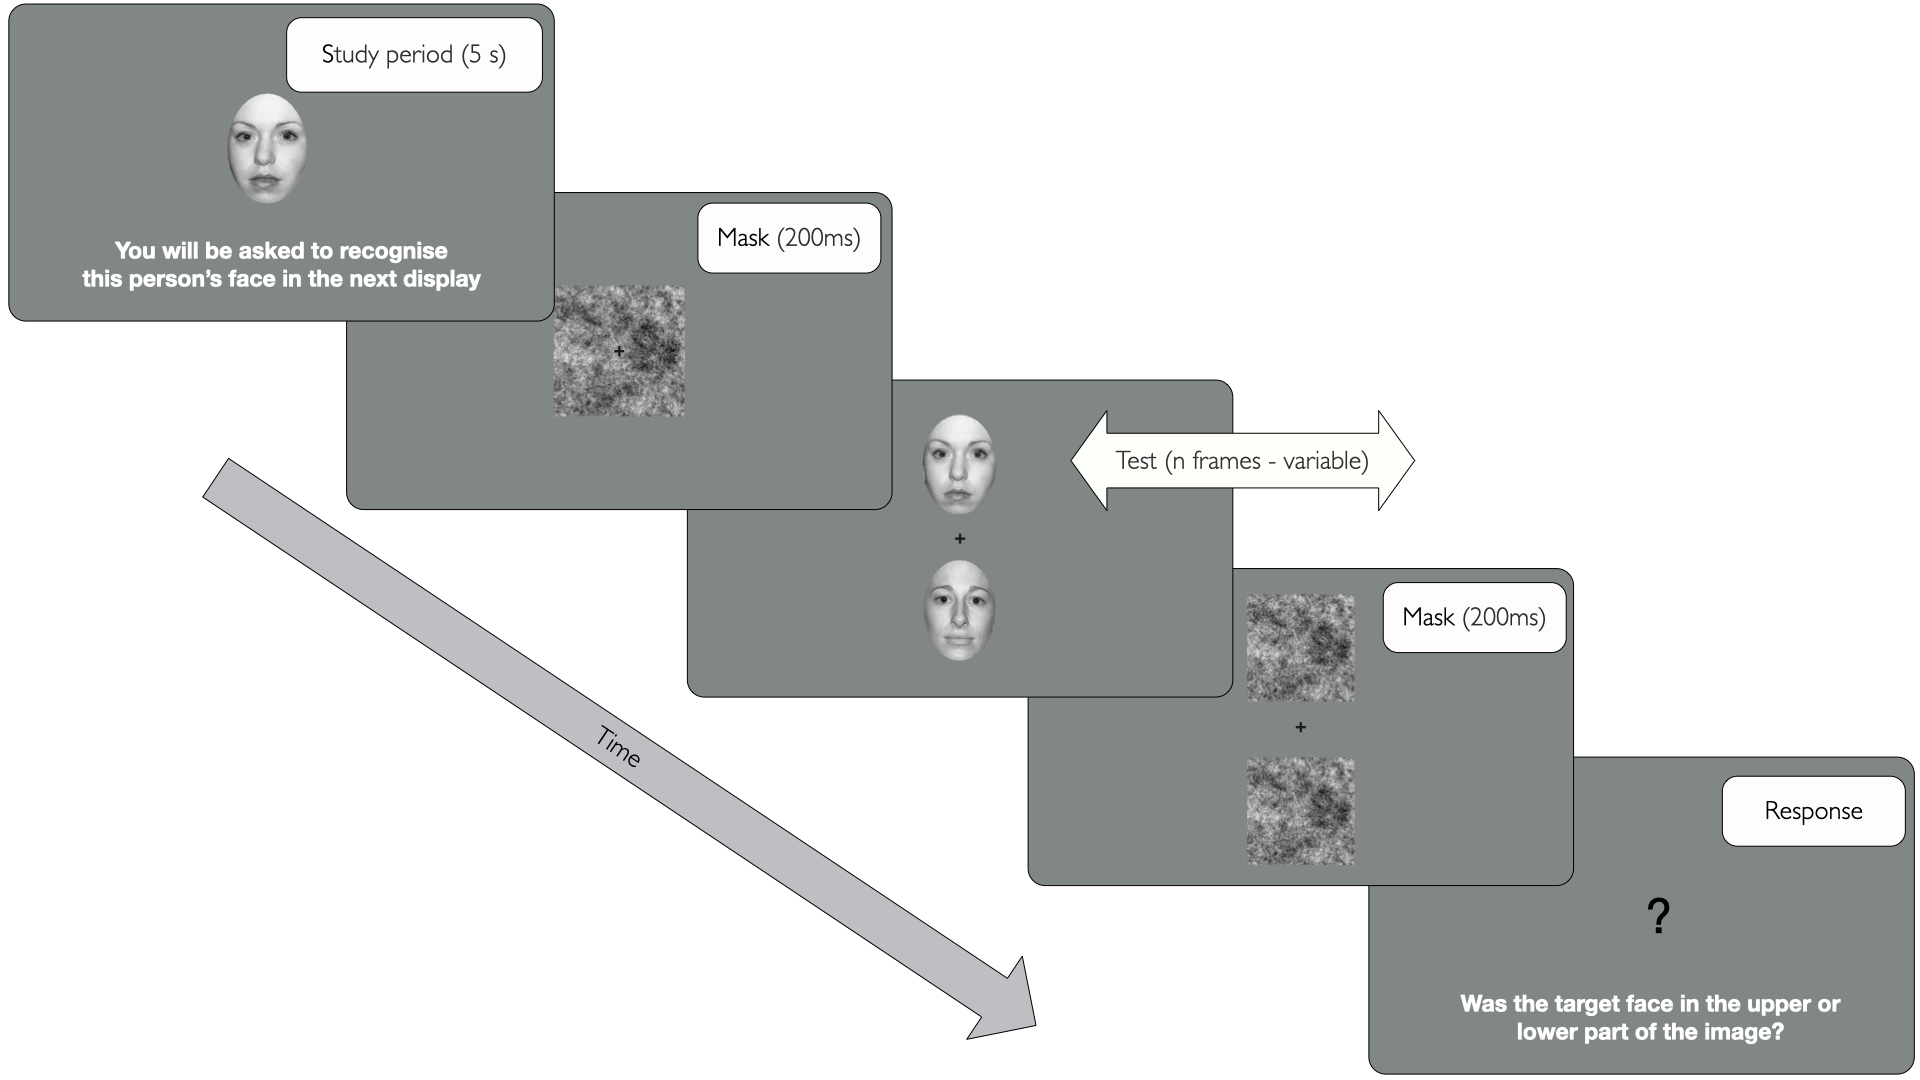
<figcaption>Figure 1: The visual stimulation sequence for each trial</figcaption>
</figure>

## Threshold Analysis

In this study we used a staircase procedure to measure face recognition speed. The staircase began with an easily detected visual display of a target face and distractor face (see <a href="#fig-procedure" class="quarto-xref">Figure 1</a>), with the participant’s task being to indicate whether the target face was in the upper or lower part of the display. Subsequent face stimuli display times were reduced until the participant made an error, at which point the staircase reversed so that face stimuli were displayed for longer periods of time until the participant responded correctly, triggering another reversal. Image display times were measured in units of 8.33 millisecond video frames. The staircase used a 1-up-3-down design, where a correct response 3 times in a row generated a reduction in display time by 1 frame. If the participant made an incorrect response, stimulus display times increased by 1 frame. Each condition (unfamiliar, familiar, self-face) included four trials (two with upright faces and two with inverted faces) and each trial included two randomly interleaved staircases. The means of the thresholds for each staircase were averaged to calculate the shortest timeframe in which the face stimuli could be accurately recognised for each condition.

## Procedure

Participants were verbally briefed on the aim of the research and provided with an information sheet. An overview of the task was described as involving recognition of 12 target faces in a series of displays over the course of the experiment. Participants were seated opposite a desk with the VIEWPixx display screen and a keyboard to complete a practice trial to familiarise themselves with the task (see <a href="#fig-setup" class="quarto-xref">Figure 2</a>). The practice trial featured a randomly selected face from the unfamiliar face set, which was then excluded from the main experiment. A random unfamiliar target face and set of distractor faces were chosen for each participant. Before each trial, written instructions appeared on the screen advising participants to focus on a fixation cross at the centre of the screen and use the up and down arrow keys to indicate whether the target face appeared above (up arrow) or below (down arrow) the fixation cross. Participants pressed any key to continue to initiate the display of a ‘target’ face stimulus for five seconds. After the inspection period, participants pressed any key to start the trial. Trials began with a mask stream followed by a display containing the target face and a distractor face above and below the fixation cross. The target face appeared randomly either above or below the fixation cross. Faces were displayed in either an upright or inverted position.

<figure id="fig-setup">
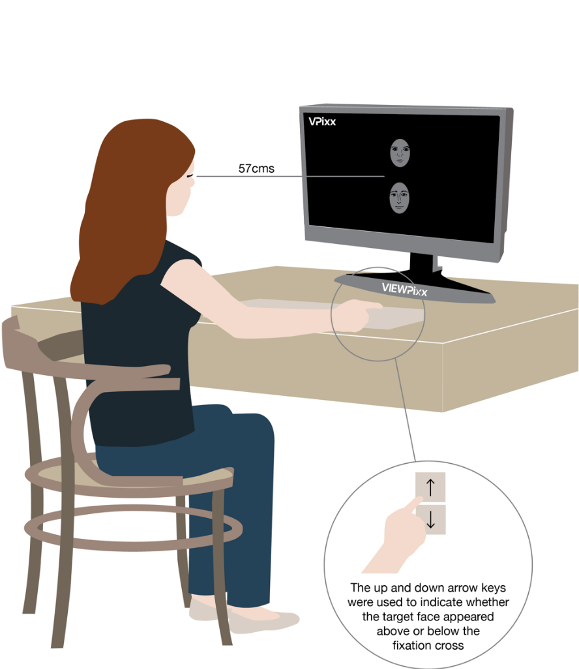
<figcaption>Figure 2: Depiction of experimental setup; image created by Simone Hale (2023)</figcaption>
</figure>

# Results

## Data Preparation

Data analyses were conducted using jamovi (version 2.3.21.0), with significance levels set to $\alpha = .05$ for analysis and $\alpha = .001$ for assumption testing. Two participants were excluded because their threshold scores were consistently above the starting point of the staircases (18 frames/ 66.67ms) for most of their trials. Thus, 28 of the original 30 participants were included in the analyses. Recognition time was measured using the number of frames required to complete the task as determined by the staircase procedure. Frames were then converted to milliseconds based on the monitor refresh rate of 120 Hz. Reaction time was measured in milliseconds.

## Data Analysis

Assumption testing for the two-way repeated-measures analysis of variance (ANOVA) indicated no violated assumptions. Visual inspection of Q-Q plots showed a normal distribution of residuals and no obvious outliers. Homogeneity of variance was assumed, as $F_{max}$ scores were below 10, in both upright, $F_{max} = 2.110$, and inverted, $F_{max} = 1.697$, orientations. Mauchly’s test indicated that the assumption of sphericity was not violated for the main effect of condition, $W(28) = 0.82, p = .081$ and the interaction between condition and face orientation, $W(28) = 0.93, p = .399$.

A 2 x 3 repeated-measures analysis of variance (ANOVA) with age as a continuous covariate was used to explore the effects of face familiarity on face recognition time. The analysis showed a main effect of familiarity, with significant differences in face recognition times between unfamiliar, familiar and self-face conditions $F(2, 52) = 48.08, p < .001, \eta_p^2 = .649$. In support of the first hypothesis, post hoc comparisons with Bonferroni corrections showed participants recognised their own faces at shorter display times compared with less familiar faces, $t(26) = 3.99, p = .001$, and unfamiliar faces, $t(26) = 11.12, p < .001$. The second hypothesis was also supported, as a post hoc comparison showed participants recognised the familiar face (that of the experimenter) at shorter display times than unfamiliar faces, $t(26) = 5.11, p < .001$.

Results also supported the third hypothesis that participants would require longer display times to recognise all faces when displays were inverted. The ANOVA indicated a main effect of orientation for face recognition times, $F(1, 26) = 50.22, p <.001, \eta_p^2 = .659$. In addition, the fourth hypothesis was supported: the face inversion effect was reduced for more familiar faces. The ANOVA indicated a significant interaction between condition and face orientation, $F(2, 52) = 11.21, p < .001, \eta_p^2 = .301$. The effects of inversion on recognition time were reduced when faces were more familiar. <a href="#fig-recognition-times" class="quarto-xref">Figure 3</a> shows recognition times for inverted and upright face orientations for each condition.

In [ ]:
#faces_2x3_time

recTimesPlot + labs(x = 'Familiarity', y = 'Mean Recognition Time (ms)') + theme_classic()

## Exploratory Analyses

### Exploring the age interaction

In this analysis, age was also included as a continuous covariate. A small but significant interaction was observed between age and condition, $F(2, 52) = 4.16, p = .021, \eta_p^2 = .138$. For older participants, longer display times were required to recognise unfamiliar and familiar faces than younger participants, whereas older participants required relatively shorter display times to recognise the self-face compared to younger participants. <a href="#fig-correlations" class="quarto-xref">Figure 4</a> shows this interaction in more detail, illustrating the relationship between age and recognition time in each condition.

In [ ]:
p1 <- ggplot(Mean_Frames, aes(x=Age, y=Unfamiliar_Upright*(1000/120))) +
  geom_point(shape=1) +    # Use hollow circles
  geom_smooth(method=lm,color="black") +  # Add linear regression line 
  #  (by default includes 95% confidence region)
  labs(x="Age", y = "Unfamiliar, Upright")+
  ylim (0, 200)+
  theme_classic() 

p2 <- ggplot(Mean_Frames, aes(x=Age, y=Familiar_Upright*(1000/120))) +
  geom_point(shape=1) +    # Use hollow circles
  geom_smooth(method=lm,color="black") +  # Add linear regression line 
  #  (by default includes 95% confidence region)
  labs(x="Age", y = "Familiar, Upright")+
  ylim (0, 200)+
  theme_classic() 


p3 <- ggplot(Mean_Frames, aes(x=Age, y=Self_Upright*(1000/120))) +
  geom_point(shape=1) +    # Use hollow circles
  geom_smooth(method=lm,color="black") +  # Add linear regression line 
  #  (by default includes 95% confidence region)
  labs(x="Age", y = "Self, Upright")+
  ylim (0, 200)+
  theme_classic() 


p4 <- ggplot(Mean_Frames, aes(x=Age, y=Unfamiliar_Inverted*(1000/120))) +
  geom_point(shape=1) +    # Use hollow circles
  geom_smooth(method=lm,color="black") +  # Add linear regression line 
  #  (by default includes 95% confidence region)
  labs(x="Age", y = "Unfamiliar, Inverted")+
  ylim (0, 220)+
  theme_classic() 

p5 <- ggplot(Mean_Frames, aes(x=Age, y=Familiar_Inverted*(1000/120))) +
  geom_point(shape=1) +    # Use hollow circles
  geom_smooth(method=lm,color="black") +  # Add linear regression line 
  #  (by default includes 95% confidence region)
  labs(x="Age", y = "Familiar, Inverted")+
  ylim (0, 220)+
  theme_classic() 


p6 <- ggplot(Mean_Frames, aes(x=Age, y=Self_Inverted*(1000/120))) +
  geom_point(shape=1) +    # Use hollow circles
  geom_smooth(method=lm,color="black") +  # Add linear regression line 
  #  (by default includes 95% confidence region)
  labs(x="Age", y = "Self, Inverted")+
  ylim (0, 220)+
  theme_classic() 

p1 + p2 + p3 + p4 + p5 + p6

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

### Reaction Time

An identical 2 x 3 repeated measures ANOVA was conducted on participant reaction times (computed as the elapsed time between stimulus presentation and button press), to identify whether reaction times would also reveal a familiarity effect in face recognition. The ANOVA showed a main effect of face condition, with faster reaction times for the more familiar faces, $F(2, 52) = 3.85, p = .028, \eta_p^2 = .129$. There was also a significant main effect of face orientation, with longer reaction times for inverted faces, $F(1, 26) = 18.71, p <.001, \eta_p^2 = .418$. However, there was no significant interaction between condition and face orientation, $F(2, 52) = 0.14, p = .872, \eta_p^2) = .005$. <a href="#fig-reaction-times" class="quarto-xref">Figure 5</a> shows reaction times for inverted and upright face orientations for each condition.

In [ ]:
#faces_2x3_RTs

RTsPlot + labs(x = 'Familiarity', y = 'Mean Reaction Time (ms)') + theme_classic()

# Discussion

To better understand the effect of greater levels of familiarity on face recognition, the present study used a staircase procedure to characterise face recognition performance. Participants responded to three different face categories manipulated by familiarity (unfamiliar, familiar, and self), and orientation (upright and inverted). Recognition time (i.e., perceptual processes) was isolated from reaction time (i.e., perceptual processes + cognitive decision + motor response) and used as an index of the familiarity effect. The overall findings confirmed predictions that more familiar faces are processed faster than less familiar and unfamiliar faces. Notably, our results underscore the self-face as a unique class of familiar face, providing compelling evidence for distinct perceptual processing.

## Familiarity and Recognition Time

In support of hypothesis one, participants recognised their own faces at shorter display times compared with other faces, providing evidence for distinct perceptual processing ([Alzueta et al., 2019](#ref-alzueta2019a); [Rooney et al., 2012](#ref-rooney2012a)). Results conflicted with an EEG study demonstrating the self-face elicited similar neural responses relative to personally familiar faces ([Wiese et al., 2021](#ref-wiese2021a)). The self-face advantage observed in the recognition times may reflect robust self-representations developed over time, strengthened by both the amount of exposure and the nature of the exposure we have with our own face ([Bortolon et al., 2017](#ref-bortolon2017a); [Tong & Nakayama, 1999](#ref-tong1999a)). For example, examining our image in the mirror is a multisensory encounter, allowing us access to motor-sensory and tactile cues that enable us to update our mental representations of ourselves ([Bortolon et al., 2017](#ref-bortolon2017a)). Further, research linking self-face recognition and self-esteem revealed that when participants viewed photographs of themselves alongside images that were manipulated to look more attractive, observers chose the manipulated images as more accurate self-representations, which correlated with higher self-esteem ([Felisberti & Musholt, 2014](#ref-felisberti2014a)). This tolerance to error, as reflected by the perceptual biases, may be a crucial and distinctive component of self-face representations that could enhance recognition performance ([Felisberti & Musholt, 2014](#ref-felisberti2014a)).

Familiarity effects were also found in the shorter display times required to recognise the familiar face (the experimenter) compared to unfamiliar faces, supporting hypothesis two. The findings align with the abundant research evidence in face recognition demonstrating a qualitative and quantitative gap between familiar and unfamiliar face processing ([Burton, 2013](#ref-burton2013a); [Burton et al., 2016](#ref-burton2016a); [Ramon & Gobbini, 2017](#ref-ramon2017a)). It is possible that familiar face recognition performance was strengthened by the opportunity for participants to learn how the experimenter’s face changed in appearance (e.g., different facial expressions and viewing angles), and the conceptual information (e.g., name and research interest) shared prior to the experiment ([Dowsett et al., 2016](#ref-dowsett2016a)).

The observation that older participants were faster at recognising their own face compared to younger participants was surprising given the rise in the importance of the “selfie” in popular culture ([Tshidzumba, 2019](#ref-tshidzumba2019a)). In line with previous research suggesting that we are better at discriminating faces from our own age group, it is possible that older participants found it easier to distinguish their own face from the distractor faces, which were young identities ([Rhodes & Anastasi, 2012](#ref-rhodes2012a)).

## Familiarity and Inversion Effects

The present study replicated the face inversion effect, a common finding in previous research that suggests human participants experience more difficulty recognising faces when they are upside down than when they are upright in their canonical orientation. Therefore, these findings support the third hypothesis, that regardless of familiarity, faces are harder to recognise upside down ([Allen-Davidian et al., 2021](#ref-allen-davidian2021a); [Kramer et al., 2018](#ref-kramer2018a); [Taubert et al., 2011](#ref-taubert2011a); [Young & Burton, 2017](#ref-young2017a)). This experiment also yielded empirical support for hypothesis four; the face inversion effect was significantly smaller for familiar faces than unfamiliar faces. Interestingly, the more familiar participants were with the face, the more immune they were to the inversion manipulation. This finding is consistent with previous studies that have also suggested that familiar faces are robust to the deleterious effects of inversion ([Keyes, 2012](#ref-keyes2012a); [Keyes & Brady, 2010](#ref-keyes2010a); [Yang et al., 2014](#ref-yang2014a)). However, results contradicted those of Alzueta et al. ([2019](#ref-alzueta2019a)), who found no significant change in the size of inversion effects across unfamiliar, familiar and self-face conditions. Inconsistent findings may be explained by the difference in task complexity between the studies. For example, the staircase used in the present study involved finding a target face between two images, displayed for a short period (e.g., 66.67ms starting point), averaging performance across 12 trials, whereas Alzueta et al. ([2019](#ref-alzueta2019a)) allowed participants 1000ms to categorise a single face display as “me”, “friend” or “stranger”, averaging performance across 450 trials.

Overall, these findings provide strong behavioural support for the idea that images of our face are processed differently to other faces, as participants were able to easily recognise their own face in the inverted position in less time than was required to recognise an upright unfamiliar face. The current results challenge the widely accepted view that all human faces are processed holistically, as the faster recognition times for inverted faces in the familiar and self-face conditions could be interpreted as evidence for stronger feature-based representations ([Gerlach & Mogensen, 2022](#ref-gerlach2022a); [Tong & Nakayama, 1999](#ref-tong1999a)).

## Reaction Time and Levels of Familiarity

Consistent with recognition time results and in alignment with the literature, there was a significant difference in reaction times between unfamiliar, familiar and self-face conditions ([Kloth et al., 2006](#ref-kloth2006a); [Ramon et al., 2011](#ref-ramon2011a); [Young & Burton, 2017](#ref-young2017a)). Interestingly, the reaction times were found to be longer than those reported in other studies, which is likely due to the inherent task complexity when using a staircase, compared to more simple, untimed go/no-go face categorisation tasks ([Bortolon et al., 2017](#ref-bortolon2017a); [Burton et al., 2016](#ref-burton2016a); [Ramon et al., 2011](#ref-ramon2011a); [Smith et al., 2016](#ref-smith2016a)).

Importantly, the data revealed that recognition times were substantially shorter than reaction times for each condition. For example, on average, participants recognised (processed) upright familiar faces within 43.8ms but required 547ms to respond (process + decision + motor response) to the target face. These findings have important implications for future research designs, as they suggest that reaction times may be underestimating face recognition performance. Reaction times were longer for inverted faces compared to upright faces, however, the data did not reveal the interaction observed in the recognition time data, as there was no significant difference in the face inversion effect between conditions. Thus, recognition time seems to be a more sensitive measure of familiarity effects in face recognition.

## Future Directions

The staircase procedure was a key strength of the research, demonstrating that the reaction times reported in research may be underestimating human face recognition ability ([Besson et al., 2016](#ref-besson2016a); [Caharel et al., 2014](#ref-caharel2014a); [Ramon et al., 2011](#ref-ramon2011a)). However, the study design could be considered difficult to compare with other face recognition research. First, recognition times cannot be directly compared with reaction times. Second, the staircase procedure only measured the ability of participants to discriminate between two stimuli, unlike other studies that require participants to identify a target face among an array of distractor faces ([Megreya & Burton, 2006](#ref-megraya2006a)). Third, the time constraint imposed by the staircase is not comparable with studies involving tasks without time limits ([Zimmermann et al., 2019](#ref-zimmermann2019a)). Future studies could attempt to address some of these comparability concerns by replicating the same study together with a standard go/no-go face categorisation task, to allow for a comparison of reaction times between the two tasks. Further, adapting the staircase to include a four-alternative force choice task, rather than the two alternatives used here, would provide a better comparison with studies involving recognition tasks that require discrimination between multiple exemplars. Although the study examined three levels of familiarity (unfamiliar, familiar, and self), other highly familiar faces such as famous faces were not included ([Campbell et al., 2020](#ref-campbell2020a); [Wiese et al., 2021](#ref-wiese2021a)). Future studies could incorporate famous faces and face stimuli of identities that are more intimately known by the perceiver such as close friends and family members, to test the effects of different levels of familiarity on face recognition in both upright and inverted orientations. This would allow further exploration of the inversion effect found in the present study. It would also assist future face recognition research in defining the familiarity construct, particularly with respect to the self-face compared with other highly familiar faces. Further, the varying levels of familiarity participants had with the experimenter created inconsistency in the construct of the familiar condition. Future studies could include a larger sample of both previously unknown and previously known participants to compare the performance of two different levels of familiarity. Including previously unknown participants also provides valuable insight into the effects of real-world face learning on recognition.

Future research should aim to involve diverse participants, including all genders and representation from all age groups. The female-only sample may have influenced results, as there is some evidence suggesting a female own-gender bias in face recognition performance ([Herlitz & Lovén, 2013](#ref-herlitz2013a); [Lovén et al., 2011](#ref-lov2011a); [Mishra et al., 2019](#ref-mishra2019a)). The mean age (43.1 years) in the present study is not reflective of the average age (~ 21-35 years) of participants in many other face recognition studies ([Kloth et al., 2006](#ref-kloth2006a); [Mohr et al., 2018](#ref-mohr2018a); [Pachai et al., 2017](#ref-pachai2017a); [Platek & Kemp, 2009](#ref-platek2009a)). Including a range of age groups is warranted given the age interaction found in the present study and research suggesting an age-bias in face recognition performance ([Rhodes & Anastasi, 2012](#ref-rhodes2012a)).

## Conclusion

Overall, the findings of the present study demonstrate the familiarity advantage in face recognition. We provide strong evidence in support of distinct perceptual processing at different levels of familiarity, as demonstrated by faster recognition times for both the self-face and familiar face compared to unfamiliar faces. The self-face appears to be processed differently to other familiar faces, validating the self-face as an important inclusion in face studies seeking to understand the familiarity effect in face recognition. The staircase procedure provided a unique insight into processing time, highlighting the potential underestimation of face recognition ability in the literature. The finding that face inversion is less disruptive to the processing of more familiar faces is further evidence of distinct perceptual processes and challenges the widely held view that faces are processed holistically. We recommend further exploration of the effects of inversion at different levels of familiarity, to enhance understanding of perceptual processing distinctions, and identify implications for holistic and featural processing theories.

Abudarham, N., Shkiller, L., & Yovel, G. (2019). Critical features for face recognition. *Cognition*, *182*, 73–83. <https://doi.org/10.1016/j.cognition.2018.09.002>

Abudarham, N., & Yovel, G. (2016). Reverse engineering the face space: Discovering the critical features for face identification. *Journal of Vision*, *16*(3), 1–18. <https://doi.org/10.1167/16.3.40>

Allen-Davidian, Y., Russo, M., Yamamoto, N., Kaufman, J., Pegna, A. J., & Johnston, P. (2021). Turning the face inversion effect on its head: Violated expectations of orientation, lighting, and gravity enhance N170 amplitudes. *The Journal of Cognitive Neuroscience*, *33*(2), 303–314. [https://doi.org/10.1162/jocn\\a\\01656](https://doi.org/10.1162/jocn\_a\_01656)

Alzueta, E., Melcón, M., Poch, C., & Capilla, A. (2019). Is your own face more than a highly familiar face? *Biological Psychology*, *142*, 100–107. <https://doi.org/10.1016/j.biopsycho.2019.01.018>

Besson, G., Barragan-Jason, G., Fabre-Thorpe, M., Puma, S., Ceccaldi, M., & Barbeau, E. J. (2016). From face processing to face recognition: Comparing three different processing levels. *Cognition*, *158*, 33–43. <https://doi.org/10.1016/j.cognition.2016.10.004>

Blauch, N. M., Behrmann, M., & Plaut, D. C. (2021). Computational insights into human perceptual expertise for familiar and unfamiliar face recognition. *Cognition*, *208*, 1–13. <https://doi.org/10.1016/j.cognition.2020.104341>

Bortolon, C., Lorieux, S., & Raffard, S. (2017). Self or familiar-face recognition advantage? New insight using ambient images. *The Quarterly Journal of Experimental Psychology*, *71*(6), 1396–1404. <https://doi.org/10.1080/17470218.2017.1327982>

Bortolon., & Raffard, S. (2018). Self-face advantage over familiar and unfamiliar faces: A three-level meta-analytic approach. *Psychonomic Bulletin & Review*, *25*, 1287–1300. <https://doi.org/10.3758/s13423-018-1487-9>

Burton, A. M. (2013). Why has research in face recognition progressed so slowly? The importance of variability. *The Quarterly Journal of Experimental Psychology*, *66*(8), 1467–1485. <https://doi.org/10.1080/17470218.2013.800125>

Burton, A. M., Jenkins, R., & Schweinberger, S. R. (2011). Mental representations of familiar faces. *British Journal of Psychology*, *102*, 2943–2958. <https://doi.org/10.1111/j.2044-8295.2011.02039.x>

Burton, A. M., Kramer, R. S. S., Ritchie, K. L., & Jenkins, R. (2016). Identity from variation: Representations of faces derived from multiple instances. *Cognitive Science*, *40*(1), 202–223. <https://doi.org/10.1111/cogs.12231>

Burton, A. M., Schweinberger, S. R., Jenkins, R., & Kaufmann, J. M. (2015). Arguments against a configural processing account of familiar face recognition. *Perspectives on Psychological Science*, *10*(4), 482–496. <https://doi.org/10.1177/1745691615583129>

Burton, A. M., Wilson, M., Cowan, M., & Bruce, V. (1999). Face recognition in poor-quality video: Evidence from security surveillance. *Psychological Science*, *10*(3), 243–248. <https://doi.org/10.1111/1467-9280.00144>

Caharel, S., Ramon, M., & Rossion, B. (2014). Face familiarity decisions take 200 msec in the human brain: Electrophysiological evidence from a go/no-go speeded task. *Journal of Cognitive Neuroscience*, *26*(1), 81–95. [https://doi.org/10.1162/jocn\\a\\00451](https://doi.org/10.1162/jocn\_a\_00451)

Caharel, S., & Rossion, B. (2021). The N170 is sensitive to long-term (personal) familiarity of a face identity. *Neuroscience*, *458*, 244–255. <https://doi.org/10.1016/j.neuroscience.2020.12.036>

Campbell, A., Louw, R., Michniak, E., & Tanaka, J. W. (2020). Identity-specific neural responses to three categories of face familiarity (own, friend, stranger) using fast periodic visual stimulation. *Neuropsychologia*, *141*, 1–12.

Campbell, A., & Tanaka, J. W. (2021). When a stranger becomes a friend: Measuring the neural correlates of real-world face familiarisation. *Visual Cognition*, *29*(10), 689–707. <https://doi.org/10.1080/13506285.2021.20002993>

Cloutier, J., Kelley, W. M., & Heatherton, T. F. (2011). The influence of perceptual and knowledge-based familiarity on the neural substrates of face perception. *Social Neuroscience*, *6*(1), 63–75. <https://doi.org/10.1080/17470911003693622>

Collins, E., Robinson, A. K., & Berrmann, M. (2018). Distinct neural processes for the perception of familiar versus unfamiliar faces along the visual hierarchy revealed by EEG. *NeuroImage*, *181*, 120–131. <https://doi.org/10.1016/j.neuroimage.2018.06.080>

Dobs, K., Isik, L., Pantazis, D., & Kanwisher, N. (2019). How face perception unfolds over time. *Nature Communications*, *10*(1), 1–10. <https://doi.org/10.1038/s41467-019-09239-1>

Dowsett, A. J., Sandford, A., & Burton, A. M. (2016). Face learning with multiple images leads to fast acquisition of familiarity for specific individuals. *The Quarterly Journal of Experimental Psychology*, *69*(1), 1–10. <https://doi.org/10.1080/17470218.2015.1017513>

Faul, F., Erdfelder, E., Buchner, A., & Lang, A. G. (2009). Statistical power analyses using g\*power 3.1: Tests for correlation and regression analyses. *Behaviour Research Methods*, *41*, 1149–1160. <https://doi.org/10.3758/BRM.41.4.1149>

Felisberti, F. M., & Musholt, K. (2014). Self-face perception: Individual differences and discrepancies associated with mental self-face representation, attractiveness and self-esteem. *Psychology & Neuroscience*, *7*(2), 65–72. <https://doi.org/10.3922/j.psns.2014.013>

Gerlach, C., & Mogensen, E. (2022). The face inversion effect does not provide a pure measure of holistic face processing. *Behaviour Research Methods*, *1-12*. <https://doi.org/10.3758/s13428-022-02054-5>

Hancock, P. J., Bruce, V., & Burton, A. M. (2000). Recognition of unfamiliar faces. *Trends in Cognitive Sciences*, *4*(9), 330–337. <https://doi.org/10.1016/s1364-6613(00)01519-9>

Herlitz, A., & Lovén, J. (2013). Sex differences and the own-gender bias in face recognition: A meta-analytic review. *Visual Cognition*, *21*(9-10), 1306–1336. <https://doi.org/10.1080/13506285.2013.823140>

Hole, G. J., George, P. A., Eaves, K., & Rasek, A. (2002). Effects of Geometric Distortions on Face-Recognition Performance. *Perception*, *31*(10), 1221–1240. <https://doi.org/10.1068/p3252>

Jenkins, R., Dowsett, A. J., & Burton, A. M. (2018). How many faces do people know? Proceedings of the royal society. *B, Biological Sciences*, *285*, 20181319. <https://doi.org/10.1098/rspb.2018.1319>

Jenkins, R., White, D., Montfort, X., & Burton, A. M. (2011). Variability in photos of the same face. *Cognition*, *121*, 313–323. <https://doi.org/10.1016/j.cognition.2011.08.001>

Karimi-Rouzbahani, H., Ramezani, F., Woolgar, A., Rich, A., & Ghodrati, M. (2021). Perceptual difficulty modulates the direction of information flow in familiar face recognition. *NeuroImage*, *233*, 1–15. <https://doi.org/10.1016/j.neuroimage.2021.117896>

Keyes, H. (2012). Categorical perception effects for facial identity in robustly represented familiar and self-faces: The role of configural and featural information. *The Quarterly Journal of Experimental Psychology*, *65*(4), 760–772. <https://doi.org/10.1080/17470218.2011.636822>

Keyes, H., & Brady, N. (2010). Self-face recognition is characterised by “bi-lateral gain” and by faster, more accurate performance which persists when faces are inverted. *The Quarterly Journal of Experimental Psychology*, *63*(5), 840–847. <https://doi.org/10.1080/17470211003611264>

Kloth, N., Dobel, C., Schweinberger, S. R., Zwitserlood, P., Bölte, J., & Junghöfer, M. (2006). Effects of personal familiarity on early neuromagnetic correlates of face perception. *European Journal of Neuroscience*, *24*, 3317–3321. <https://doi.org/10.1111/j.1460-9568.2006.05211.x>

Kramer, R. S. S., Young, A. W., & Burton, A. M. (2018). Understanding face familiarity. *Cognition*, *172*, 46–58. <https://doi.org/10.1016/j.cognition.2017.12.005>

Kramer, R. S. S., Young, A. W., Day, M., & Burton, A. M. (2017). Robust social categorization emerges from learning the identities of very few faces. *Psychological Review*, *24*(2), 115–129. <https://doi.org/10.1037/rev000048>

Lee, J. K. W., Janssen, S. M. J., & Estudillo, A. J. (2022). A featural account for own-face processing? Looking for support from face inversion, composite face, and part-whole tasks. *I-Perception*, *13*(4), 1–22. <https://doi.org/10.1177/20416695221111409>

Liccione, D., Moruzzi, S., Rossi, F., Manganaro, A., Porta, M., Nugrahaningsih, N., Caserio, V., & Allegri, N. (2014). Familiarity is not notoriety. *Frontiers in Human Neuroscience*, *8*, 672–672. <https://doi.org/10.3389/fnhum.2014.00672>

Long, H., Peluso, N., Baker, C. I., Japee, S., & Taubert, J. (2023). A database of heterogeneous faces for studying naturalistic expressions. *Scientific Reports*, *13*(1), 5383. <https://doi.org/10.1038/s41598-023-32659-5>

Lovén, J., Herlitz, A., & Rehnman, J. (2011). Women’s own-gender bias in face recognition memory. *Experimental Psychology*, *58*(4), 333–340. <https://doi.org/10.1027/1618-3169/a000100>

Maurer, D., Grand, R. L., & Mondloch, C. J. (2002). The many faces of configural processing. *Trends in Cognitive Sciences*, *6*(6), 255–260. <https://doi.org/10.1016/S1364-6613(02)01903-4>

Megreya, A. M., & Burton, A. M. (2006). Unfamiliar faces are not faces: Evidence from a matching task. *Memory & Cognition*, *34*(4), 865–876. <https://doi.org/10.3758/BF03193433>

Megreya, A. M., & Burton, A. M. (2008). Matching faces to photographs: Poor performance in eyewitness memory (without the memory). *Journal of Experimental Psychology: Applied*, *14*(4), 364–372. <https://doi.org/10.1037/a0013464>

Mishra, M. V., Likitlersuang, J., Wilmer, J., Cohan, S., Germine, L., & DeGutis, J. M. (2019). Gender differences in familiar face recognition and the influence of sociocultural gender inequality. *Scientific Reports*, *9*, 1–11. <https://doi.org/10.1038/s41598-019-54074-5>

Mohr, S., Wang, A., & Engell, A. D. (2018). Early identity recognition of familiar faces is not dependent on holistic processing. *Social Cognitive and Affective Neuroscience*, *13*(10), 1019–1027. <https://doi.org/10.1093/scan/nsy079>

Murphy, J., Ipser, A., Gaigg, S. B., & Cook, R. (2015). Exemplar variance supports robust learning of facial identity. *Journal of Experimental Psychology: Human Perception and Performance*, *41*(3), 577–581. <https://doi.org/10.1037/xhp0000049>

Oleggio Castello, M., Wheeler, K. G., Cipolli, C., Gobbini, M. I., & Urgesi, C. (2017). Familiarity facilitates feature-based face processing. *PLoS One*, *12*(6), 1–13. <https://doi.org/10.1371/journal.pone.0178895>

Oliveira, E. H., Esteves, F., & Carvalho, H. (2015). Clinical profiles of stigma experiences, self-esteem and social relationships among people with schizophrenia, depressive, and bipolar disorders. *Psychiatry Research*, *229*(1-2), 167–173. <https://doi.org/10.1016/j.psychres.2015.07.047>

Oruc, I., Shafai, F., Murthy, S., Lages, P., & Ton, T. (2019). The adult face-diet: A naturalistic observation study. *Vision Research*, *157*, 222–229. <https://doi.org/10.1016/j.visres.2018.01.001>

Pachai, M. V., Sekular, A. B., Bennett, P. J., Schyns, P. G., & Ramon, M. (2017). Personal familiarity enhances sensitivity to horizontal structure during processing of face identity. *Journal of Vision*, *17*(6), 1–11. <https://doi.org/10.1167/17.6.5>

Platek, S. M., & Kemp, S. M. (2009). Is family special to the brain? An event-related fMRI study of familiar, familial, and self-face recognition. *Neuropsychologia*, *47*, 849–858. <https://doi.org/10.1016/j.neuropsychologia.2008.12.027>

Quek, G. L., Rossion, B., & Liu-Shuang, J. (2021). Critical information thresholds underlying generic and familiar face categorisation at the same face encounter. *NeuroImage*, *243*, 1–14. <https://doi.org/10.1016/j.neuroimage.2021.118481>

Ramon, M., & Belle, G. van. (2016). Real-life experience with personally familiar faces enhances discrimination based on global information. *PeerJ*, *4*, 1–13. <https://doi.org/10.7717/peerj.1465>

Ramon, M., Caharel, S., & Rossion, B. (2011). The speed of recognition of personally familiar faces. *Perception*, *40*, 437–449. <https://doi.org/10.1068/p6794>

Ramon, M., & Gobbini, M. I. (2017). Familiarity matters: A review on prioritized processing of personally familiar faces. *Visual Cognition*, *26*(3), 179–195. <https://doi.org/10.1080/13506285.2017.1405134>

Redfern, A. S., & Benton, C. P. (2019). Representation of facial identity includes expression variability. *Vision Research*, *157*, 123–131. <https://doi.org/10.1016/j.visres.2018.05.004>

Rhodes, M. G., & Anastasi, J. S. (2012). The own-age bias in face recognition: A meta-analytic and theoretical view. *Psychological Bulletin*, *138*(1), 146–174. <https://doi.org/10.1037/a0025750>

Rooney, B., Keyes, H., & Brady, N. (2012). Shared or separate mechanisms for self-face and other-face processing? Evidence from adaptation. *Frontiers in Psychology*, *3*, 1–9. https://doi.org/<https://doi.org.10.3389.fpsyg.2012.00066>

Rossion, B. (2008). Picture-plane inversion leads to qualitative changes of face perception. *Acta Psychologica*, *128*(2), 274–289. <https://doi.org/10.1016/j.actpsy.2008.02.003>

Rossion, B., & Taubert, J. (2019). What can we learn about human individual face recognition from experimental studies in monkeys? *Vision Research*, *157*, 142–158. <https://doi.org/10.1016/j.visres.2018.03.012>

Sandford, A., & Burton, A. M. (2014). Tolerance for distorted faces: Challenges to a configural processing account of familiar face recognition. *Cognition*, *132*(3), 262–268. <https://doi.org/10.1016/j.cognition.2014.04.005>

Schwartz, L., & Yovel, G. (2016). The roles of perceptual and conceptual information in face recognition. *Journal of Experimental Psychology: General*, *145*(11), 1493–1511. <https://doi.org/10.1037/xge0000220>

Schwartz, L., & Yovel, G. (2019). Learning faces as concepts rather than percepts improves face recognition. *Journal of Experimental Psychology: Learning, Memory, and Cognition*, *45*(10), 1733–1747. <https://doi.org/10.1037/xlm0000673>

Smith, M. L., Volna, B., & Ewing, L. (2016). Distinct information critically distinguishes judgements of face familiarity and identity. *Journal of Experimental Psychology: Human Perception and Performance*, *42*(11), 1770–1779. <https://doi.org/10.1037/xhp0000243>

Taubert, J., Apthorp, D., Aagten-Murphy, D., & Alais, D. (2011). The role of holistic processing in face perception: Evidence from the face inversion effect. *Vision Research*, *51*, 1273–1278. <https://doi.org/10.1016/j.visres.2011.04.002>

Taubert, J., Van Belle, G., Vanduffel, W., Rossion, B., & Vogels, R. (2015). The effect of face inversion for neurons inside and outside <span class="nocase">fMRI</span>-defined face-selective cortical regions. *Journal of Neurophysiology*, *113*(5), 1644–1655. <https://doi.org/10.1152/jn.00700.2014>

Tong, F., & Nakayama, K. (1999). Robust representations for faces: Evidence from visual search. *Journal of Experimental Psychology: Human Perception and Performance*, *25*(4), 1016–1035. <https://doi.org/10.1037//0096-1523.25.4.1016>

Tottenham, N., Tanaka, J. W., Leon, A. C., McCarry, T., Nurse, M., Hare, T. A., Marcus, D. J., Westerlund, A., Casey, B. J., & Nelson, C. (2009). The NimStim set of facial expressions: Judgements from untrained research participants. *Psychiatry Research*, *168*(3), 242–249. <https://doi.org/10.1016/j.psychres.2008.05.006>

Towler, A., Kemp, R. I., Bruce, V., Burton, A. M., Dunn, J. D., & White, D. (2019). Are face recognition abilities in humans and sheep really “comparable”? *Royal Society Open Science*, *6*(1), 180772. <https://doi.org/10.1098/rsos.180772>

Tshidzumba, N. A. (2019). The selfie culture: Identity creation and status conferral on social media. *Gender & Behaviour*, *17*(3), 13577–13584.

Valentine, T. (1988). Upside-down faces: A review of the effect of inversion upon face recognition. *British Journal of Psychology*, *79*(4), 471–491. <https://doi.org/10.1111/j.2044-8295.1988.tb02747.x>

Waidmann, E. N., Koyano, K. W., Hong, J. J., Russ, B. E., & Leopold, D. A. (2022). Local features drive identity responses in macaque anterior face patches. *Nature Communications*, *13*(1), 5592. <https://doi.org/10.1038/s41467-022-33240-w>

White, D., Burton, A. L., & Kemp, R. I. (2016). Not looking yourself: The cost of self-selecting photographs for identity verification. *British Journal of Psychology*, *107*, 359–373. <https://doi.org/10.1111/bjop.12141>

White, D., & Burton, A. M. (2022). Individual differences and the multidimensional nature of face perception. *Nature Reviews Psychology*, *1*(5), 287–300. <https://doi.org/10.1038/s44159-022-00041-3>

Wiese, H., Hobden, G., Siilbek, E., Martignac, V., Flack, T. R., Ritchie, K. L., Young, A. W., & Burton, A. M. (2021). Familiarity is familiarity is familiarity: Event-related brain potentials reveal qualitatively similar representations of personally familiar and famous faces. *Journal of Experimental Psychology: Learning, Memory, and Cognition*, *48*(8), 1144–1164. <https://doi.org/10.1037/xlm0001063>

Wiese, H., Tüttenberg, S. C., Ingram, B. T., Chan, C. Y. X., Gurbuz, Z., Burton, A. M., & Young, A. W. (2019). A robust neural index of high face familiarity. *Psychological Science*, *30*(2), 261–272. <https://doi.org/10.1177/0956797618813572>

Yang, N., Shafai, F., & Oruc, I. (2014). Size determines whether specialized expert processes are engaged for recognition of faces. *Journal of Vision*, *14*(8), 1–12. <https://doi.org/10.1167/14.8.17>

Young, A. W., & Burton, A. M. (2017). Are we face experts? *Trends in Cognitive Sciences*, *22*(2), 100–110. <https://doi.org/10.1016/j.tics.2017.11.007>

Zimmermann, F. G. S., Yan, X., & Rossion, B. (2019). An objective, sensitive and ecologically valid neural measure of rapid human individual face recognition. *Royal Society Open Science*, *6*, 181904. <https://doi.org/10.1098/rsos.181904>